In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
class_c = pd.read_csv('class_c.csv')

In [6]:
sales = pd.read_csv('sales.csv')

In [7]:
sales.head()

,New SKU,Brand,Upstream Contact,Type,Location,W1,W2,W3,W4,W5,...,W1.1,W2.1,W3.1,W4.1,W5.1,W6.1,W7.1,W8.1,W9.1,W10.1
0,GN1063121-Z-WH2203,Woodsworth,Saffron Art & Craft,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Woodsworth,Suncity Handicrafts Pvt Ltd,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,Mudramark,WOODENMOOD,HB-SW,Mumbai,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GN1576961-Z-WH32492,Mudramark,Woodenmood,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2
4,GN7828171-Z-WH19566,Woodsworth,Incredible Handicrafts and Minerals,HB-SW,Mumbai,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
class_c.columns

Index(['class C'], dtype='object')

In [10]:
class_c.columns = ['New SKU'] #replacing that column

In [11]:
class_c.head()

,New SKU
0,GN2828661-Z-WH32480
1,GN6224471-Z-WH11393
2,GN3513371-Z-WH32511
3,GN6605761-Z-WH32475
4,GN8018871-Z-WH32479


In [12]:
sales_c = pd.merge(sales,class_c, how='inner', on= 'New SKU')

In [13]:
sales_c.to_csv('sales_cdata.csv')

**Forecast**

In [14]:
class_c_forecast = pd.read_csv('class_cFinal.csv')

In [15]:
class_c_forecast.head()

,week,sales
0,03-01-2019,70
1,10-01-2019,43
2,17-01-2019,38
3,24-01-2019,50
4,31-01-2019,47


In [16]:
#Convert month into date and time
class_c_forecast['week'] = pd.to_datetime(class_c_forecast['week'])

In [17]:
#week as a index
class_c_forecast.set_index('week', inplace = True)

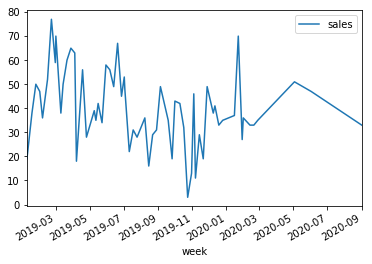

In [18]:
class_c_forecast.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [19]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result = adfuller(class_c_forecast['sales'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [21]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 4 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [22]:
ad_fuller(class_c_forecast['sales'])

ADF Test statistic : -4.683510080017429
p-value : 9.036444882970369e-05
#Lags used : 0
Number of observations used : 61
We reject the null hypothesis. Data is stationary.


**Auto Regressive model**

In [23]:
from pandas.plotting import autocorrelation_plot

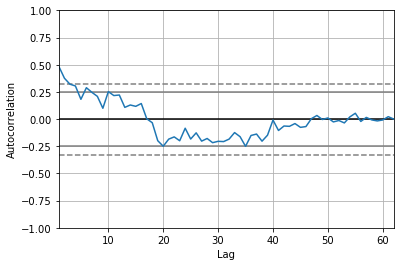

In [24]:
autocorrelation_plot(class_c_forecast['sales'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


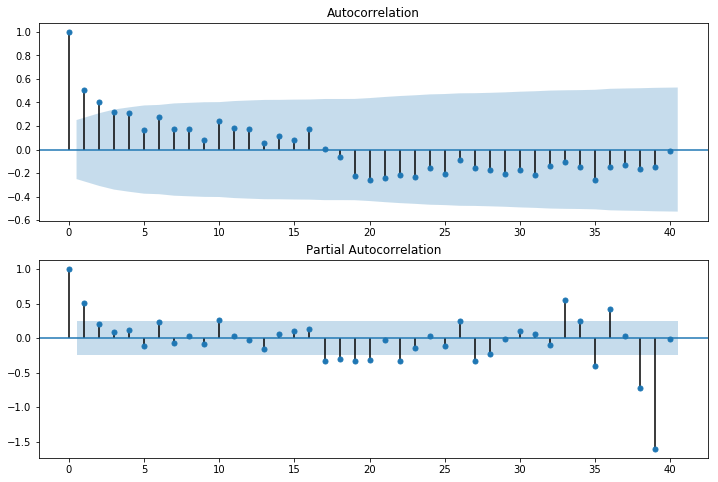

In [26]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(class_c_forecast['sales'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(class_c_forecast['sales'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model = ARIMA(class_c_forecast['sales'], order = (1,0,1)) #(p,d,q)
model_fit = model.fit()

C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                   62
Model:                     ARMA(1, 1)   Log Likelihood                -247.263
Method:                       css-mle   S.D. of innovations             13.009
Date:                Thu, 02 Apr 2020   AIC                            502.526
Time:                        02:29:21   BIC                            511.035
Sample:                             0   HQIC                           505.867
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3126      5.046      8.186      0.000      31.422      51.204
ar.L1.sales     0.8487      0.141      6.007      0.000       0.572       1.126
ma.L1.sales    -0.5118      0.259     -1.974      0.048      -1.020      -0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1783           +0.0000j            1.1783            0.0000
MA.1            1.9538           +0.0000j            1.9538            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
class_c_forecast.tail(15)

,sales
week,
2019-11-28,49
2019-05-12,35
2019-12-12,41
2019-12-19,33
2019-12-26,35
2020-02-01,36
2020-09-01,33
2020-01-16,37
2020-01-23,70


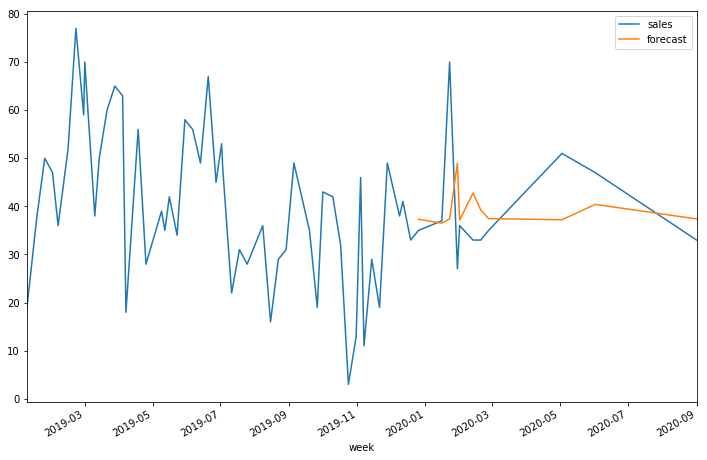

In [31]:
class_c_forecast['forecast']=model_fit.predict(start='2019-12-26',end='2020-05-03')
class_c_forecast[['sales','forecast']].plot(figsize=(12,8))

**Metrics**

In [33]:
farima = class_c_forecast['forecast']['2019-12-26' : ]
actual = class_c_forecast['sales']['2019-12-26' :]

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 176.893762
Mean Absolute Error of Amberville Brand Using Arima: 9.251361


In [39]:
farima

week
2019-12-26    37.310857
2020-02-01    37.138065
2020-09-01    37.386477
2020-01-16    36.503071
2020-01-23    37.398329
2020-01-30    48.972542
2020-06-02    40.411855
2020-02-13    42.767376
2020-02-20    39.257075
2020-02-27    37.460463
2020-05-03    37.214635
Name: forecast, dtype: float64

**For 6 months**

In [35]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=24)[0]

In [36]:
forecast

array([42.47839852, 42.30195986, 42.15222345, 42.02514816, 41.91730446,
       41.82578182, 41.74811024, 41.68219347, 41.62625256, 41.57877775,
       41.53848778, 41.50429529, 41.4752775 , 41.45065127, 41.42975197,
       41.41201557, 41.3969634 , 41.38418923, 41.3733483 , 41.36414804,
       41.35634015, 41.3497139 , 41.34409047, 41.3393181 ])

In [37]:
class_c_outofsample = pd.DataFrame(data=forecast, columns=['Forecast']) #putting into dataframe

In [38]:
class_c_outofsample

,Forecast
0,42.478399
1,42.301960
2,42.152223
3,42.025148
4,41.917304
5,41.825782
6,41.748110
7,41.682193
8,41.626253
9,41.578778
